<a href="https://colab.research.google.com/github/seungyeonhdata/TIL/blob/master/pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
#한글 나오게
import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings("ignore")

# 1. 붓꽃 데이터 분석

In [12]:
iris=sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


1. 1.  붓꽃 데이터에서 종 별로 sepal_length, sepal_width 등의 평균

In [39]:
iris_mean=iris.groupby('species').mean()
iris_mean

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


(0.0, 10.0)

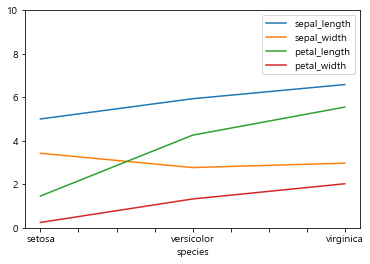

In [45]:
iris_mean.plot()
plt.ylim(0,10)

1. 2. 붓꽃 종 별로 표준화 후, 종 별로 가장 유사한 붓꽃 번호 출력  
 예시)  
 setosa: 3,7  
 verisicolor: 60,73  
 virginica:112, 134

In [177]:
#표준화한 붓꽃 데이터
iris_s=iris.groupby('species').apply(lambda x: (x-x.mean())/x.std())
iris_s['species']=iris['species']
iris_s

,sepal_length,sepal_width,petal_length,petal_width,species
0,0.266674,0.189941,-0.357011,-0.436492,setosa
1,-0.300718,-1.129096,-0.357011,-0.436492,setosa
2,-0.868111,-0.601481,-0.932836,-0.436492,setosa
3,-1.151807,-0.865288,0.218813,-0.436492,setosa
4,-0.017022,0.453749,-0.357011,-0.436492,setosa
...,...,...,...,...,...
145,0.176134,0.080621,-0.637803,0.997633,virginica
146,-0.452916,-1.469783,-1.000191,-0.458766,virginica
147,-0.138391,0.080621,-0.637803,-0.094666,virginica
148,-0.610178,1.320944,-0.275415,0.997633,virginica


In [ ]:
#각 데이터 유클리드 거리

In [339]:
#(np.sqrt(((iris_s.iloc[0,:-1]-iris_s.iloc[1:50,:-1])**2).sum(axis=1)))

# 2. 팁 데이터 분석

In [338]:
tips=sns.load_dataset('tips')
tips.info()
tips

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## 2. 1. 팁 데이터에서 팁의 비율이 요일, 점심/저녁, 인원수에 어떤 영향을 받는지 확인

### 요일과 팁
팁의 절대량 분석 후 팁의 비율 분석

         tip
day         
Thur  171.83
Fri    51.96
Sat   260.40
Sun   247.39


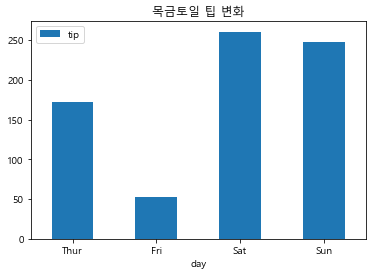

In [377]:
print(tips.groupby('day')[['tip']].sum())
tips.groupby('day')[['tip']].sum().plot.bar(rot=0, title='목금토일 팁 변화')

팁의 비율 분석

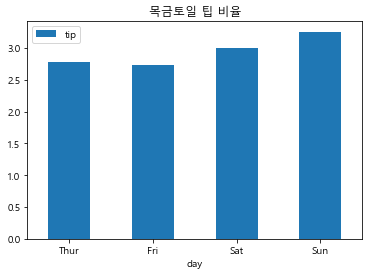

In [378]:
tips.groupby('day')[['tip']].mean().plot.bar(rot=0, title='목금토일 팁 비율')

- 전체 팁은 **토 > 일 > 목 > 금** 순서로 평일보다 주말이 많고, 토요일이 일요일보다 팁의 양이 많고, 금요일이 현저히 적었다.        
- 하지만 *판매횟수 대비 팁의 양(팁의 비율)*은 **일 > 토 > 목 > 금** 순서로 일요일이 토요일보다 더 높고, 금요일과 목요일의 팁 비율도 큰 차이가 없어서 금요일에 손님이 적게 들었던 것으로 보인다.

### 시간과 팁

           tip
time          
Lunch   185.51
Dinner  546.07


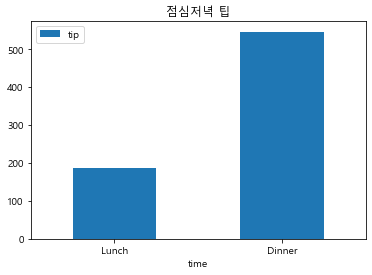

In [383]:
print(tips.groupby('time')[['tip']].sum())
tips.groupby('time')[['tip']].sum().plot.bar(rot=0, title='점심저녁 팁')

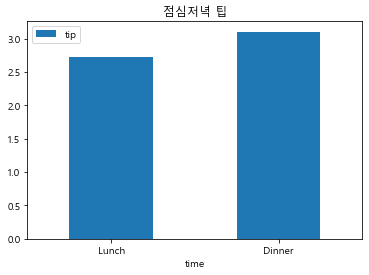

In [385]:
tips.groupby('time')[['tip']].mean().plot.bar(rot=0, title='점심저녁 팁')

팁 절대량 : **점심<<저녁**  
팁 비율 : **점심<저녁**  
저녁 판매량이 점심 판매량보다 3배 가량 많았다. 팁의 비율은 저녁때가 0.5정도 높음

### 인원수와 팁


         tip
size        
1       5.75
2     402.84
3     128.94
4     153.01
5      20.14
6      20.90


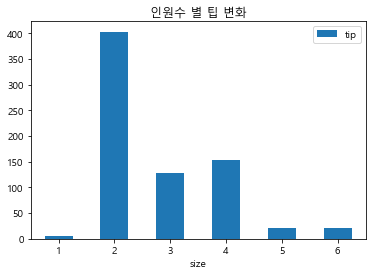

In [330]:
print(tips.groupby('size')[['tip']].sum())
tips.groupby('size')[['tip']].sum().plot.bar(rot=0, title='인원수 별 팁 변화')

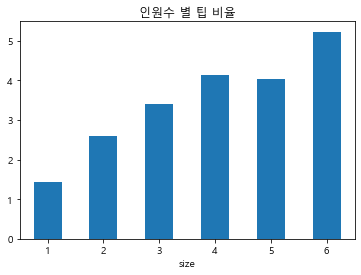

In [387]:
tips.groupby('size')['tip'].mean().plot.bar(rot=0, title='인원수 별 팁 비율')

2명 손님이 많이 들어서 2명인 팀의 팁의 절대량이 매우 높다.  
**2명 > 4명 > 3명 > 6명 > 5명 > 1명** 순으로 팁이 많다.  
팁의 비율을 보면 **6인 > 4인 > 5인 > 3인 > 2인 > 1인** 순으로 팁이 후하다는 것을 알 수 있다.

2. 2. 어떤 요인이 가장 크게 작용했는지

In [337]:
tips.corr(method='pearson')

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [407]:
tips.pivot_table('tip',['day','time','size'], aggfunc=sum).T.stack()

day         Thur           Fri            Sat     Sun
time       Lunch Dinner  Lunch Dinner  Dinner  Dinner
    size                                             
tip 1       1.83    NaN   1.92    NaN    2.00     NaN
    2     114.24    3.0  11.76  30.55  133.43  109.86
    3      10.77    NaN   3.00    NaN   68.36   46.81
    4      21.09    NaN    NaN   4.73   53.61   73.58
    5       5.00    NaN    NaN    NaN    3.00   12.14
    6      15.90    NaN    NaN    NaN     NaN    5.00

# 3. 타이타닉 데이터 분석

In [15]:
titanic=sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


3. 1. qcut으로 타이타닉 데이터를 세 개의 나이 그룹으로 나눈다.

In [343]:
titanic['age_group']=pd.qcut(titanic.age,3,labels=['low','mid','high'])
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_group
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,low
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,high
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,mid
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,high
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,mid
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,low
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,NaN
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,mid


3. 2. 성별, 선실, 나이 그룹에 의한 생존율을 데이터프레임으로 계산. (행은 성별, 나이그룹으로 다중 인덱스, 열에는 선실 인덱스) 생존율은 해당 그룹의 생존 인원수를 전체 인원수로 나눈값

In [403]:
t_prop=titanic.groupby(['sex','age_group','class'])['survived'].sum().unstack()/len(titanic)
t_prop

class                First    Second     Third
sex    age_group                              
female low        0.023569  0.022447  0.033670
       mid        0.020202  0.033670  0.014590
       high       0.048260  0.020202  0.004489
male   low        0.005612  0.011223  0.019080
       mid        0.012346  0.003367  0.020202
       high       0.026936  0.002245  0.003367

3. 3. 성별 및 선실에 의한 생존율을 피벗 데이터 형태로 만든다

In [404]:
t=titanic.pivot_table('survived',index='sex',columns='class', aggfunc=sum)
t_prop2=t/len(titanic)
t_prop2

class,First,Second,Third
sex,,,
female,0.102132,0.078563,0.080808
male,0.050505,0.019080,0.052750


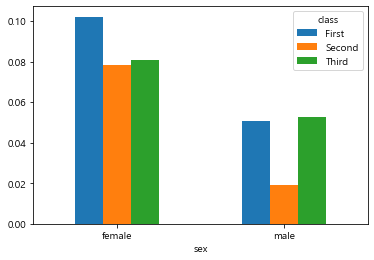

In [370]:
t_prop2.plot.bar(rot=0)

# 4. MNIST 숫자 이미지 데이터 분석

In [209]:
from sklearn.datasets import load_digits
X=load_digits().data
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [242]:
X.shape

(1797, 64)

4. 1. 내적을 이용하여 첫번째 이미지와 10번째 이미지의 유사도 구하기

In [234]:
sum([a*b for (a,b) in zip(X[0],X[9])])

#2. numpy
#np.dot(X[0],X[9])

#3. python 내부 함수
#X[0]@X[9]

2807.0

4. 2. 코사인 유사도를 이용하여 첫번째 이미지와 10번째 이미지 유사도 구하기

In [241]:
#1. 코사인 유사도
def norm(arr):
    res=0
    for i in arr:
        res+=i**2
    return np.sqrt(res)

np.dot(X[0],X[9]) / ( norm(X[0]) * norm(X[9]) )

0.7808790331160783

In [237]:
#2. 넘파이에 있는 normalization 식 사용
np.dot(X[0],X[9])/(np.linalg.norm(X[0])*np.linalg.norm(X[9]))

0.7808790331160783

In [223]:
#3. 8x8 2차원 식으로 바꿔 코사인 유사도 구하기
X[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [229]:
from sklearn.metrics.pairwise import cosine_similarity
np.mean(cosine_similarity(X[0].reshape(8,8),X[9].reshape(8,8)))

0.6689580571429674

# 5. 자전거 데이터 분석

datetime -> hourly date + timestamp   
season -> 1 = spring, 2 = summer, 3 = fall, 4 = winter   
holiday -> whether the day is considered a holiday  
workingday -> whether the day is neither a weekend nor holiday  
weather -> 1: Clear, Few clouds, Partly cloudy, Partly cloudy  
           2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist  
           3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  
           4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog   
temp -> temperature in Celsius  
atemp -> "feels like" temperature in Celsius  
humidity -> relative humidity  
windspeed -> wind speed  
casual -> number of non-registered user rentals initiated  
registered -> number of registered user rentals initiated  
count -> number of total rentals  



In [26]:
df=pd.read_csv("../Downloads/0402_test.csv", parse_dates=['datetime'])
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [449]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
year          0
month         0
day           0
hour          0
dtype: int64

In [28]:
df.info()
df['year']=df['datetime'].dt.year
df['month']=df['datetime'].dt.month
df['day']=df['datetime'].dt.day
df['hour']=df['datetime'].dt.hour
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  day         10886 non-null  int64         
 15  hour        10886 non-null  int64         
dtypes: datetime64[ns](1), 

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22


5. 1. 각 컬럼값에 따른 count값의 변화를 시각화

#### 시간별 분석

- 연도별 사용량 : 전년대비 66% 상승

In [508]:
yearly=df.groupby('year')[['count']].sum()
(yearly.loc[2012]-yearly.loc[2011])/yearly.loc[2011]

count    0.666921
dtype: float64

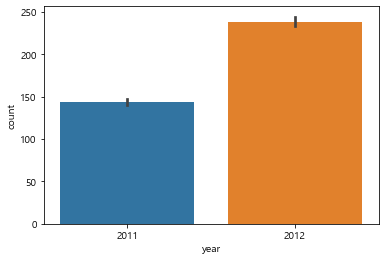

In [509]:
sns.barplot(data=df, x='year',y='count')

- **계절/연도별** 자전거 사용량 :전년대비 전체적으로 상승  
    - 가을에 사용량 가장 많고 봄에 가장 적다. 

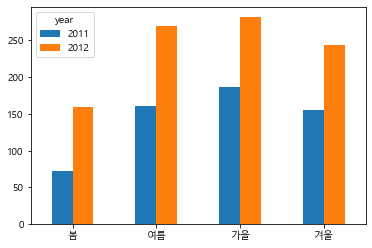

In [532]:
df_season=df.pivot_table(index='season',columns='year',values='count')
df_season.index=['봄','여름','가을','겨울']
df_season.plot.bar(rot=0)

- **월별** 자전거 사용량 :
5~9월 사이에 이용량 최대

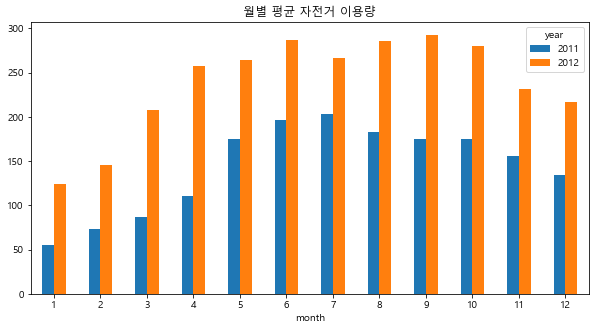

In [493]:
df_monthly=df.pivot_table(index='month',columns='year',values='count')
df_monthly.plot.bar(rot=0, title='월별 평균 자전거 이용량', figsize=(10,5)) 

- **일별** 사용량 : 특별히 많은 날은 없다

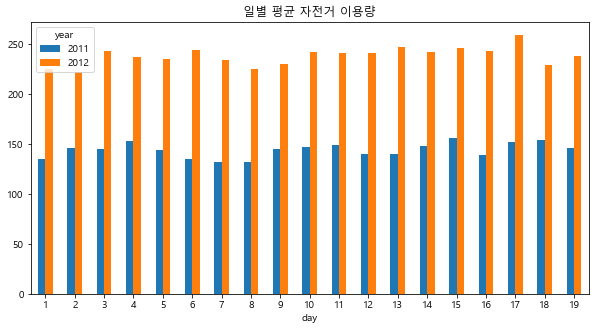

In [510]:
df_dayly=df.pivot_table(index='day',columns='year',values='count')
df_dayly.plot.bar(rot=0, title='일별 평균 자전거 이용량', figsize=(10,5)) 

- **시간대별** 사용량 : 8시와 17-18시에 가장 많다.  
     - 출퇴근 시간에 이용량 늘어나는 것으로 보인다. 낮에는 스테디

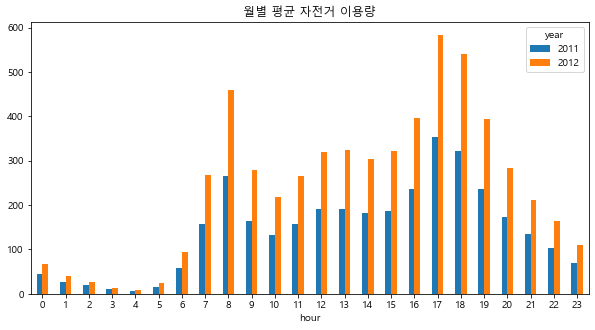

In [511]:
df_hourly=df.pivot_table(index='hour',columns='year',values='count')
df_hourly.plot.bar(rot=0, title='시간별 평균 자전거 이용량', figsize=(10,5)) 

- **평일/휴일** 이용량으로 검증
    - 쉬는 날에는 12~18시까지 이용량 증가/유지
    - 일하는 날에는 8시, 17-18시에만 이용량 증가

In [522]:
df_workday=df.pivot_table(index='hour',columns='workingday',values='count')
df_workday

workingday,0,1
hour,,
0,94.489655,36.732258
1,71.910345,16.003236
2,53.748252,8.436066
3,25.534722,4.892734
4,8.544828,5.363636
5,9.373239,24.529032
6,19.993103,102.577419
7,47.268966,290.690323
8,112.255172,479.945161


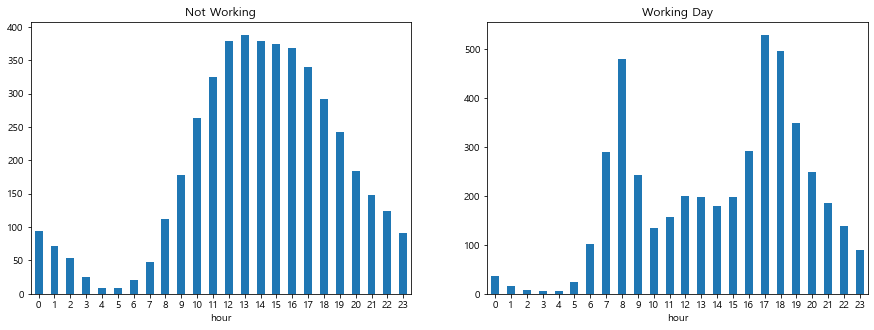

In [523]:
fig, axes=plt.subplots(1,2,figsize=(15,5))
df_workday[0].plot.bar(ax=axes[0], rot=0, title='Not Working')
df_workday[1].plot.bar(ax=axes[1], rot=0, title='Working Day')

In [524]:
df_holiday=df.pivot_table(index='hour',columns='holiday',values='count')
df_holiday

holiday,0,1
hour,,
0,54.796380,66.769231
1,33.582766,43.230769
2,22.747126,28.000000
3,11.738717,12.416667
4,6.377622,7.384615
5,19.961276,13.230769
6,77.357466,38.923077
7,216.119910,111.000000
8,366.703620,229.000000


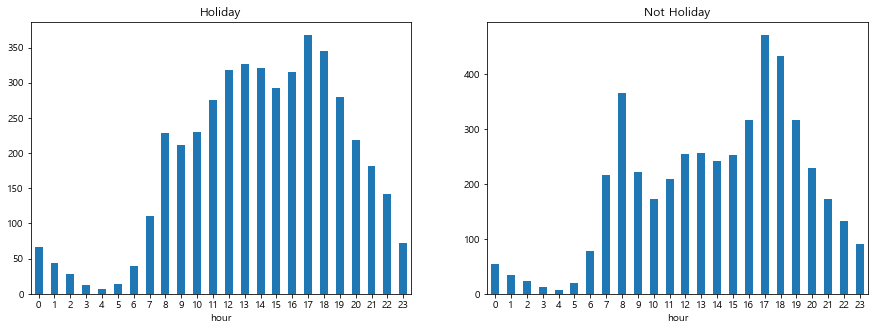

In [527]:
fig, axes=plt.subplots(1,2,figsize=(15,5))
df_holiday[1].plot.bar(ax=axes[0], rot=0, title='Holiday')
df_holiday[0].plot.bar(ax=axes[1], rot=0, title='Not Holiday')

- **신규/기존** 회원 이용량
    - 자전거로 출퇴근하는 인원은 대부분 정규로 등록하여 이용
    - 단타로 이용하는 인원은 시간에 영향이 없다

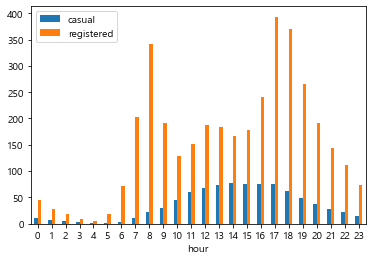

In [540]:
df_user=df.groupby('hour')['casual','registered'].mean()
df_user.plot.bar(rot=0)

- **날씨**에 따른 대여량
    - 화창할 때 이용량 가장 많다.
    - 2011년에는 폭우/폭설시 이용내역이 없는것으로 보아 운영을 하지 않았다가. 2012년에는 폭우/폭설에도 운영한 것으로 보인다.

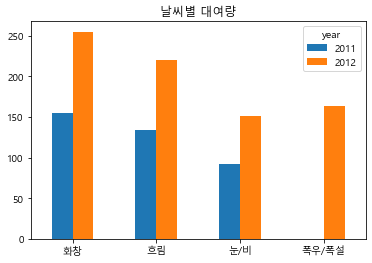

In [530]:
df_weather=df.pivot_table(index='weather',columns='year',values='count')
df_weather.index=['화창','흐림','눈/비','폭우/폭설']
df_weather.plot.bar(rot=0, title="날씨별 대여량")

#1: Clear, Few clouds, Partly cloudy, Partly cloudy  
#2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist  
#3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  
#4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog   

- **기온/체감온도**에 따른 사용량
    - 일하는날/휴일로 비교해보았다
    - 온도가 높을수록 사용량 늘어남.. 더운날에 자전거타는게 좋은가보다

In [556]:
df['temp_range']=pd.qcut(df.temp,10,labels=np.arange(0,50,5))
df['atemp_range']=pd.qcut(df.atemp,10,labels=np.arange(0,50,5))

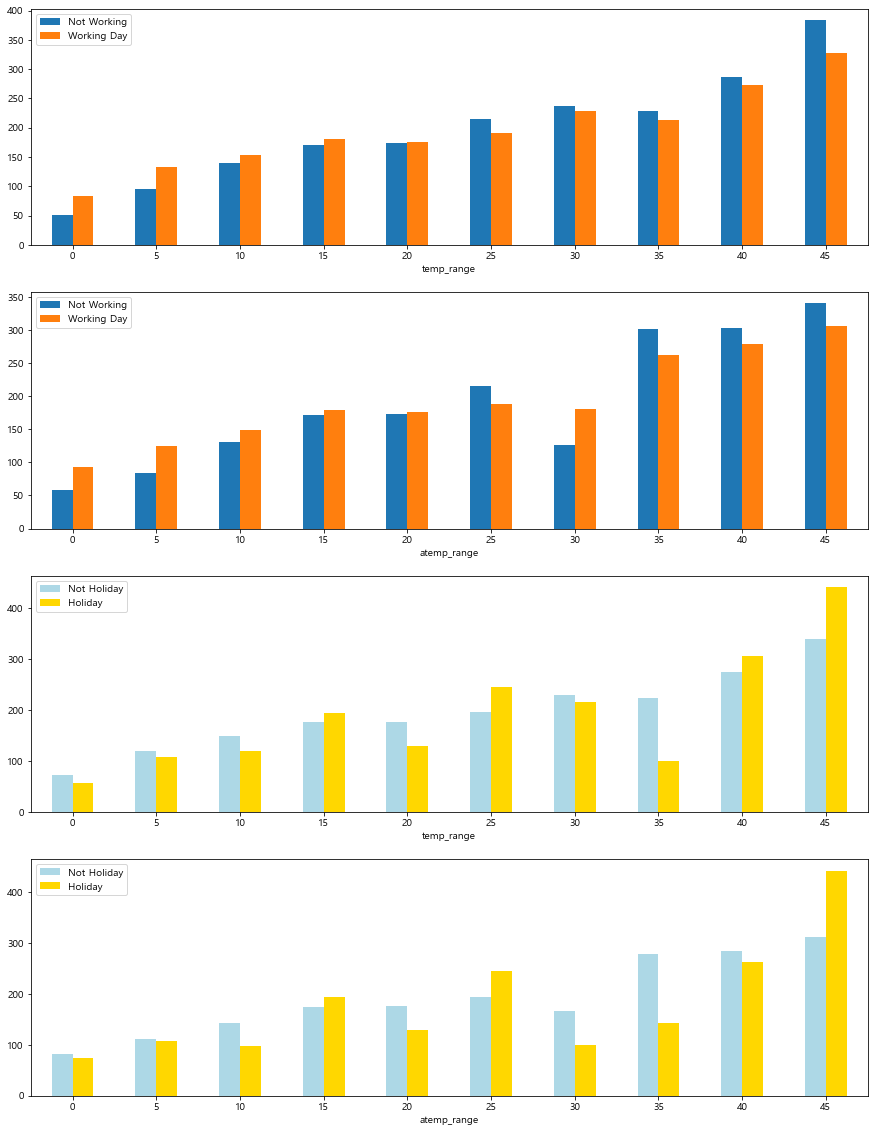

In [599]:
df_temp=df.pivot_table(index='temp_range',columns='workingday',values='count')
df_atemp=df.pivot_table(index='atemp_range',columns='workingday',values='count')
df_temp.columns=['Not Working','Working Day']
df_atemp.columns=['Not Working','Working Day']

df_temp_h=df.pivot_table(index='temp_range',columns='holiday',values='count')
df_atemp_h=df.pivot_table(index='atemp_range',columns='holiday',values='count')
df_temp_h.columns=['Not Holiday','Holiday']
df_atemp_h.columns=['Not Holiday','Holiday']

fig,axes=plt.subplots(4,1,figsize=(15,20))
df_temp.plot.bar(rot=0,ax=axes[0])
df_atemp.plot.bar(rot=0,ax=axes[1])
df_temp_h.plot.bar(rot=0,ax=axes[2], color={'lightblue','gold'})
df_atemp_h.plot.bar(rot=0,ax=axes[3], color={'lightblue','gold'})

    - 기온과 상관없이 일하는 날에 많이 이용

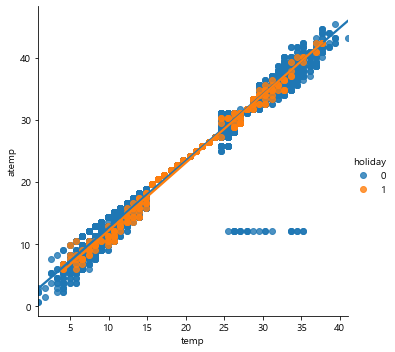

In [570]:
sns.lmplot(x='temp',y='atemp',data=df, hue='holiday')

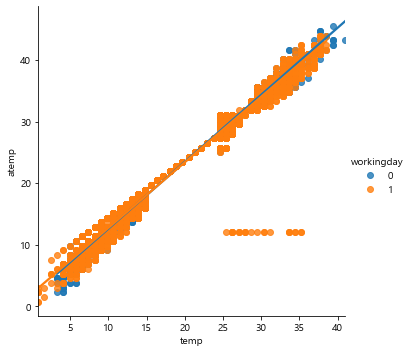

In [600]:
sns.lmplot(x='temp',y='atemp',data=df, hue='workingday')